### Load Data

In [2]:
!unzip hearth-disease-recognition.zip

Archive:  hearth-disease-recognition.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import numpy as np
import pandas as pd

## Download csv -> Copy to your google drive -> Change to the your file location

data_path = "/content/train.csv"
test_path = "/content/test.csv"
# data_path = "/kaggle/input/hearth-disease-recognition/train.csv"

df = pd.read_csv(data_path)
df_submission = pd.read_csv(test_path)

In [4]:
df.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [5]:
df["History of HeartDisease or Attack"].isnull().sum()

1694

In [6]:
# Drop rows where 'History of HeartDisease or Attack' is null and store the dropped rows in a new DataFrame
dropped_rows = df[df['History of HeartDisease or Attack'].isnull()]

# Keep the remaining rows in the original DataFrame
df = df.dropna(subset=["History of HeartDisease or Attack"])

# Count remaining null values in 'History of HeartDisease or Attack'
null_count = df["History of HeartDisease or Attack"].isnull().sum()

print(f"Remaining null values in 'History of HeartDisease or Attack': {null_count}")

Remaining null values in 'History of HeartDisease or Attack': 0


I think we should try drop it out first.

# 2.2 EDA Data


In [7]:
# Check columns list
df.keys()

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [8]:
# Check data type for each column
df.dtypes

,0
ID,object
History of HeartDisease or Attack,object
High Blood Pressure,object
Told High Cholesterol,object
Cholesterol Checked,object
Body Mass Index,float64
Smoked 100+ Cigarettes,object
Diagnosed Stroke,object
Diagnosed Diabetes,object
Leisure Physical Activity,object


## Dataframe Basic Exploration
| **Function**   | **Description** |
|---------------|---------------|
| `df.describe()` | Summary statistics (count, mean, std, min, max, etc.) |
| `df.mean()`  | Mean (average) of numeric columns |
| `df.median()` | Median of numeric columns |
| `df.std()` | Standard deviation |
| `df.var()` | Variance |
| `df.min()` | Minimum value |
| `df.max()` | Maximum value |
| `df.sum()` | Sum of values |
| `df.count()` | Count of non-null values |
| `df.corr()` | Correlation between numeric columns |
| `df.quantile(0.25)` | 25th percentile (Q1) |
| `df.mode()` | Most frequent value (mode) |

---

In [9]:
# Descriptive statistics
df.describe()

,Body Mass Index,Age
count,209665.000000,221390.000000
mean,28.181723,54.660215
std,6.686984,17.773171
min,11.210000,18.000000
25%,23.870000,42.000000
50%,27.060000,56.000000
75%,31.080000,67.000000
max,98.630000,100.000000


In [10]:
# For each unique, count how many appeared.
df['General Health'].value_counts()

,count
General Health,
Good,77221
Fair,67055
Excellent,40218
Poor,27010
Very Poor,9885


In [11]:
df['Education Level'].value_counts()

,count
Education Level,
College graduate,87903
Some college or technical school,61833
High school graduate,57491
Some high school,9522
Elementary,4404
Never attended school,237


In [12]:
df['Income Level'].value_counts()

,count
Income Level,
"$75,000 or more",73468
"$50,000 to less than $75,000",36831
"$35,000 to less than $50,000",32141
"$25,000 to less than $35,000",23416
"$20,000 to less than $25,000",18864
"$15,000 to less than $20,000",15477
"($10,000 to less than $15,000",10878
"Less than $10,000",10315


## Check Data Balance

In [13]:
df["History of HeartDisease or Attack"].value_counts()

,count
History of HeartDisease or Attack,
No,203322
Yes,18068


#2.3 Data Cleaning

**Data cleaning** is the process of detecting, correcting, or removing incorrect, incomplete, or irrelevant data from a dataset. This step is crucial for improving data quality before analysis or modeling.

*   Handling missing values
*   Removing duplicates
*   Converting data types
*   Standardizing text format
*   Removing outliers

# 2.4 Feature Engineering


In [14]:
df.keys()

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [ ]:
# !pip install --upgrade nltk
# !pip install --upgrade fsspec
# !pip install --upgrade gcsfs

In [15]:
text_columns = []
numeric_columns = []

for col in df.columns:
  if df[col].dtype == 'object':
    text_columns.append(col)
  else:
    numeric_columns.append(col)

print("Text Columns:", text_columns)
print("Numeric Columns:", numeric_columns)

Text Columns: ['ID', 'History of HeartDisease or Attack', 'High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity', 'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Vegetable or Fruit Intake (1+ per Day)']
Numeric Columns: ['Body Mass Index', 'Age']


## Label Encoding

* Normal label encoder for income level

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
income_order = ['$75,000 or more', '$50,000 to less than $75,000',
               '$35,000 to less than $50,000', '$25,000 to less than $35,000',
               '$20,000 to less than $25,000', '$15,000 to less than $20,000',
               '($10,000 to less than $15,000', 'Less than $10,000']

# Create a mapping dictionary
income_mapping = {income: i for i, income in enumerate(income_order)}

# Apply the mapping to create a new encoded column
df['Income_Level_Encoded'] = df['Income Level'].map(income_mapping)

dropped_rows['Income_Level_Encoded'] = dropped_rows['Income Level'].map(income_mapping)

df_submission['Income_Level_Encoded'] = df_submission['Income Level'].map(income_mapping)

In [ ]:
# df['Income_Level_TargetEncoded'] = df.groupby('Income Level')['History of HeartDisease or Attack'].transform(lambda x: x.map({'Yes': 1, 'No': 0}).mean())

* Midpoint Values for income level

In [ ]:
# import pandas as pd
# import numpy as np

# income_mapping = {
#     '$75,000 or more': 75000,  # Assuming a reasonable upper bound for this category
#     '$50,000 to less than $75,000': 62500,
#     '$35,000 to less than $50,000': 42500,
#     '$25,000 to less than $35,000': 30000,
#     '$20,000 to less than $25,000': 22500,
#     '$15,000 to less than $20,000': 17500,
#     '($10,000 to less than $15,000': 12500,
#     'Less than $10,000': 10000
# }

# df['Income_Level_Midpoint'] = df['Income Level'].map(income_mapping)

# df_submission['Income_Level_Midpoint'] = df_submission['Income Level'].map(income_mapping)

* Ordinal Values Using `OrdinalEncoder`

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming your DataFrame is named 'df' and the income level column is 'income_level'
encoder = OrdinalEncoder(categories=[['Less than $10,000', '($10,000 to less than $15,000', '$15,000 to less than $20,000', '$20,000 to less than $25,000', '$25,000 to less than $35,000', '$35,000 to less than $50,000', '$50,000 to less than $75,000', '$75,000 or more']])

df['Income_Level_Ordinal'] = encoder.fit_transform(df[['Income Level']])

df_submission['Income_Level_Ordinal'] = encoder.fit_transform(df_submission[['Income Level']])

dropped_rows['Income_Level_Ordinal'] = encoder.fit_transform(dropped_rows[['Income Level']])

In [18]:
df['Income_Level_Ordinal'].unique()

array([2., 0., 7., 5., 3., 1., 6., 4.])

In [19]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['History of HeartDisease or Attack', 'High Blood Pressure', 'Income_Level_Encoded',
                     'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes',
                     'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity',
                     'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier',
                     'General Health', 'Difficulty Walking', 'Sex', 'Education Level',
                    'Vegetable or Fruit Intake (1+ per Day)']

# List of columns to encode
submission_to_encode = ['High Blood Pressure', 'Income_Level_Encoded',
                     'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes',
                     'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity',
                     'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier',
                     'General Health', 'Difficulty Walking', 'Sex', 'Education Level',
                    'Vegetable or Fruit Intake (1+ per Day)']

# Loop through the columns and apply Label Encoding
for column in columns_to_encode:
    df[column + '_encoded'] = encoder.fit_transform(df[column])

for column in submission_to_encode:
    df_submission[column + '_encoded'] = encoder.fit_transform(df_submission[column])
    dropped_rows[column + '_encoded'] = encoder.fit_transform(dropped_rows[column])

In [20]:
df = df.drop(columns=columns_to_encode)
df_submission = df_submission.drop(columns=submission_to_encode)
dropped_rows = dropped_rows.drop(columns=submission_to_encode)

In [21]:
df.head()

,ID,Body Mass Index,Income Level,Age,Income_Level_Ordinal,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,...,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,train_000001,40.68,"$15,000 to less than $20,000",64,2.0,0,1,5,1,1,...,0,0,0,1,0,4,1,0,2,1
1,train_000002,24.36,"Less than $10,000",50,0.0,0,0,7,0,0,...,0,1,0,0,1,1,0,0,0,0
2,train_000003,27.33,"$75,000 or more",61,7.0,0,1,0,1,1,...,0,0,0,1,1,4,1,0,2,1
3,train_000004,27.01,"$35,000 to less than $50,000",74,5.0,0,1,2,0,1,...,0,1,0,1,0,2,0,0,5,1
5,train_000006,25.11,"$75,000 or more",67,7.0,0,1,0,1,1,...,0,1,0,1,0,2,0,1,0,1


In [ ]:
# df = df.drop(columns=["Income Level"])
# df_submission = df_submission.drop(columns=["Income Level"])
# dropped_rows = dropped_rows.drop(columns=["Income Level"])

In [22]:
df["History of HeartDisease or Attack_encoded"].unique()

array([0, 1])

In [23]:
df["Income_Level_Encoded_encoded"].unique()

array([5, 7, 0, 2, 4, 6, 1, 3])

* Standard Scaler for the numeric columns

Based on the ordinal nature of your Income_Level_Encoded feature, I recommend keeping the Label Encoding without applying StandardScaler. This preserves the inherent order and relationships between the income levels.

In [24]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numeric_columns' list is defined as in your previous code

# numeric_columns = ['Body Mass Index', 'Age', 'Income_Level_TargetEncoded', 'Income_Level_Midpoint_encoded']
numeric_columns = ['Body Mass Index', 'Age', 'Income_Level_Encoded_encoded'] # Don't include the income!
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_submission[numeric_columns] = scaler.fit_transform(df_submission[numeric_columns])

dropped_rows[numeric_columns] = scaler.fit_transform(dropped_rows[numeric_columns])

In [25]:
df.head(5)

,ID,Body Mass Index,Income Level,Age,Income_Level_Ordinal,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,...,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,train_000001,1.869050,"$15,000 to less than $20,000",0.525500,2.0,0,1,1.371969,1,1,...,0,0,0,1,0,4,1,0,2,1
1,train_000002,-0.571518,"Less than $10,000",-0.262206,0.0,0,0,2.313398,0,0,...,0,1,0,0,1,1,0,0,0,0
2,train_000003,-0.127371,"$75,000 or more",0.356706,7.0,0,1,-0.981603,1,1,...,0,0,0,1,1,4,1,0,2,1
3,train_000004,-0.175225,"$35,000 to less than $50,000",1.088147,5.0,0,1,-0.040174,0,1,...,0,1,0,1,0,2,0,0,5,1
5,train_000006,-0.459360,"$75,000 or more",0.694294,7.0,0,1,-0.981603,1,1,...,0,1,0,1,0,2,0,1,0,1


## Deal with the null values

In [26]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 ID                                                    0
Body Mass Index                                   11725
Income Level                                          0
Age                                                   0
Income_Level_Ordinal                                  0
History of HeartDisease or Attack_encoded             0
High Blood Pressure_encoded                           0
Income_Level_Encoded_encoded                          0
Told High Cholesterol_encoded                         0
Cholesterol Checked_encoded                           0
Smoked 100+ Cigarettes_encoded                        0
Diagnosed Stroke_encoded                              0
Diagnosed Diabetes_encoded                            0
Leisure Physical Activity_encoded                     0
Heavy Alcohol Consumption_encoded                     0
Health Care Coverage_encoded                          0
Doctor Visit Cost Barrier_encoded                     0
General Health_enco

## 2.4.2 Predict the Missing BMI

Seeing the correlations

In [27]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Extract the correlation of BMI with other features
bmi_correlations = correlation_matrix['Body Mass Index']

# Print the correlations
print(bmi_correlations)

Body Mass Index                                   1.000000
Age                                               0.003893
Income_Level_Ordinal                             -0.081775
History of HeartDisease or Attack_encoded         0.056948
High Blood Pressure_encoded                       0.217642
Income_Level_Encoded_encoded                      0.081775
Told High Cholesterol_encoded                     0.001457
Cholesterol Checked_encoded                       0.084248
Smoked 100+ Cigarettes_encoded                    0.017905
Diagnosed Stroke_encoded                          0.024072
Diagnosed Diabetes_encoded                        0.208739
Leisure Physical Activity_encoded                -0.138235
Heavy Alcohol Consumption_encoded                -0.046348
Health Care Coverage_encoded                     -0.007983
Doctor Visit Cost Barrier_encoded                 0.048792
General Health_encoded                            0.151496
Difficulty Walking_encoded                        0.1910

In [32]:
# prompt: sorting the bmi_correlations to see which higher and doing the abs.

# Sort the BMI correlations by absolute value in descending order
sorted_bmi_correlations = bmi_correlations.abs().sort_values(ascending=False)

sorted_bmi_correlations


,Body Mass Index
Body Mass Index,1.000000
High Blood Pressure_encoded,0.217642
Diagnosed Diabetes_encoded,0.208739
Difficulty Walking_encoded,0.191098
General Health_encoded,0.151496
Leisure Physical Activity_encoded,0.138235
Cholesterol Checked_encoded,0.084248
Education Level_encoded,0.083545
Income_Level_Encoded_encoded,0.081775
Income_Level_Ordinal,0.081775


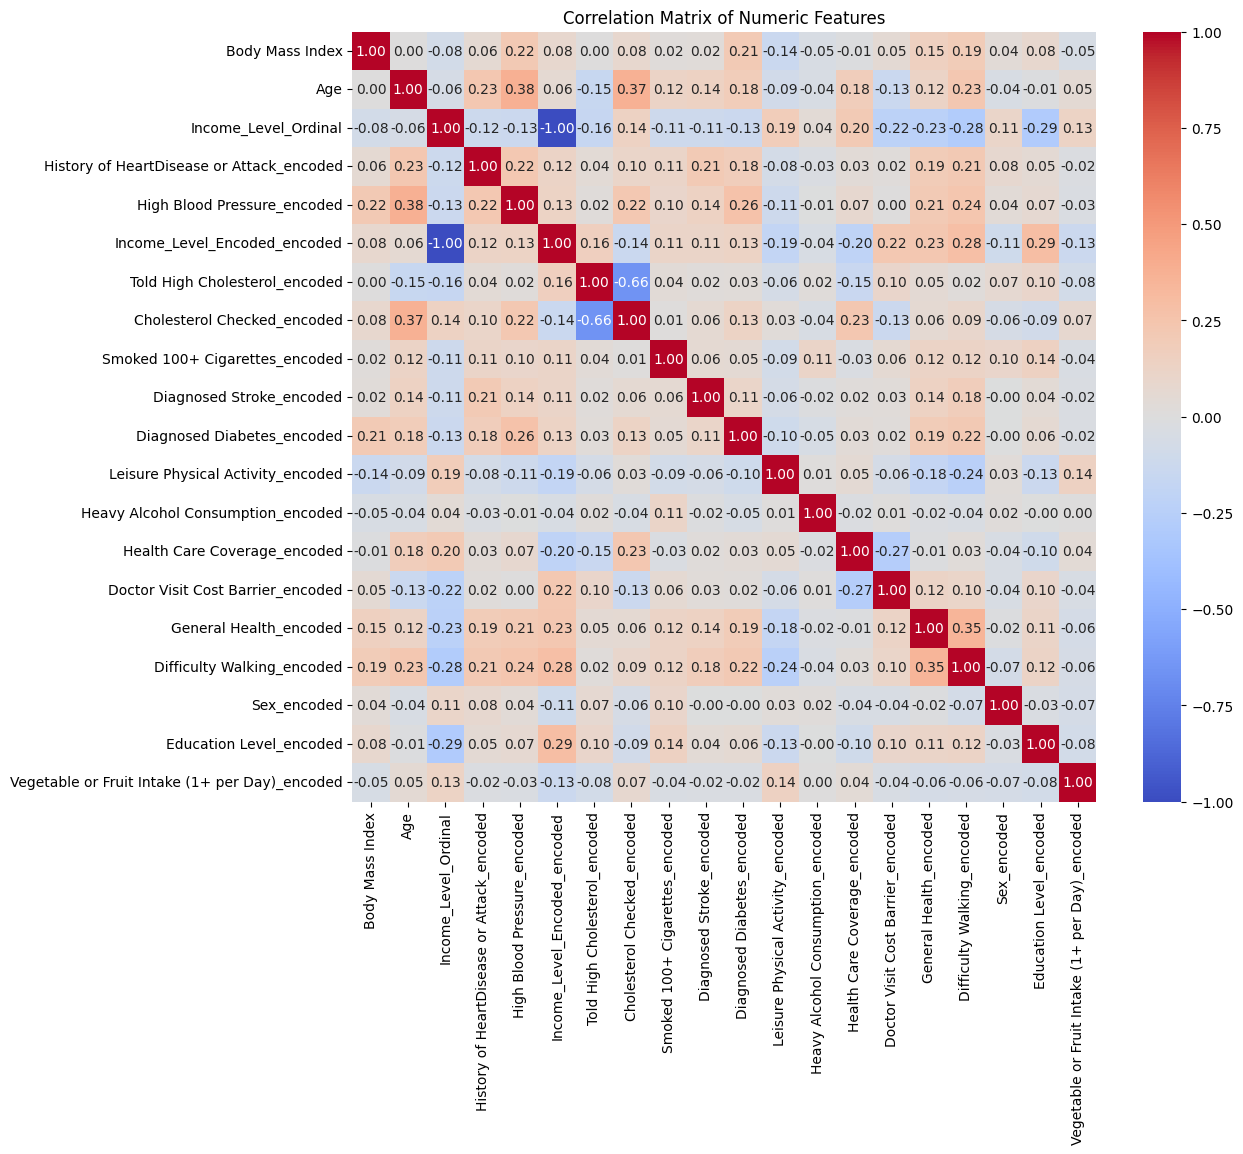

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

---

## Correlations of BMI

- 'High Blood Pressure_encoded'
- 'Diagnosed Diabetes_encoded'
- 'General Health_encoded'
- 'Difficulty Walking_encoded'
- 'Leisure Physical Activity_encoded'
- 'Income_Level_Ordinal'/'Income_Level_Encoded_encoded'

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# 1. Prepare the data
df_train = df[df['Body Mass Index'].notnull()]
X = df_train[['High Blood Pressure_encoded', 'Diagnosed Diabetes_encoded', 'General Health_encoded', 'Difficulty Walking_encoded', 'Leisure Physical Activity_encoded' , 'History of HeartDisease or Attack_encoded']]
y = df_train['Body Mass Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* RandomForestRegressor

In [36]:
# 2. Choose and train a model (Linear Regression)
model = RandomForestRegressor(random_state=42)

# The rest of the code remains the same
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error: {mse}")

print(y_pred_val)

Mean Squared Error: 0.8980748081411201
[ 0.131289   -0.25012239 -0.20796233 ... -0.07077652 -0.25427496
  0.24527554]


* Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Replace Linear Regression with Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# The rest of the code remains the same
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error: {mse}")

print(y_pred_val)

Mean Squared Error: 0.8975238876030172
[ 0.13533188 -0.23750031 -0.19515408 ... -0.06664785 -0.25297796
  0.20978957]


In [ ]:
# from sklearn.neighbors import KNeighborsRegressor

# model = KNeighborsRegressor(n_neighbors=2)  # You can adjust the number of neighbors
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# mse = mean_squared_error(y_val, y_pred)
# print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.2760579285399536


In [ ]:
# from sklearn.svm import LinearSVR

# model = LinearSVR()  # Initialize LinearSVR
# model.fit(X_train, y_train)  # Train the model
# y_pred = model.predict(X_val)  # Make predictions
# mse = mean_squared_error(y_val, y_pred)  # Calculate MSE
# print(f"Mean Squared Error: {mse}")  # Print the MSE

Mean Squared Error: 0.9306264117309351


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


In [ ]:
# # prompt: SGDRegressor

# from sklearn.linear_model import SGDRegressor

# # * SGDRegressor
# model = SGDRegressor(random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# mse = mean_squared_error(y_val, y_pred)
# print(f"Mean Squared Error (SGDRegressor): {mse}")
# print(y_pred_val)

Mean Squared Error (SGDRegressor): 0.9028267302186777
[ 0.04181095 -0.22841148 -0.1657721  ... -0.23858974 -0.48663575
  0.38325686]


In [37]:
# 4. Predict missing BMI values
df_missing = df[df['Body Mass Index'].isnull()]
X_missing = df_missing[['High Blood Pressure_encoded', 'Diagnosed Diabetes_encoded', 'General Health_encoded', 'Difficulty Walking_encoded', 'Leisure Physical Activity_encoded' , 'History of HeartDisease or Attack_encoded']]
predicted_bmi = model.predict(X_missing)

# Replace missing values in the original DataFrame
df.loc[df['Body Mass Index'].isnull(), 'Body Mass Index'] = predicted_bmi

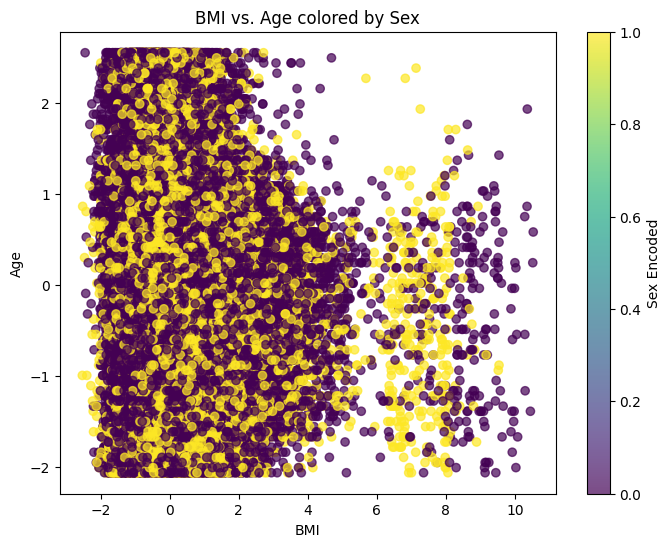

In [38]:
# prompt: Plot the graph between BMI, age and 'sex_encoded'

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'BMI', 'age', and 'sex_encoded' columns

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Body Mass Index'], df['Age'], c=df['Sex_encoded'], cmap='viridis', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs. Age colored by Sex')
plt.colorbar(label='Sex Encoded')
plt.show()


# 2.5 Model Training

In [39]:
df.keys()

Index(['ID', 'Body Mass Index', 'Income Level', 'Age', 'Income_Level_Ordinal',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded', 'Income_Level_Encoded_encoded',
       'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded'],
      dtype='object')

## Balance Data

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Check the class distribution after resampling
# print(y_train_resampled.value_counts())

diabetes
0    73203
1    73203
Name: count, dtype: int64


In [40]:
keyschosen = ['Body Mass Index', 'Age',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded',
        'Income_Level_Encoded_encoded',
      #  'Income_Level_Ordinal',
       'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded']

In [41]:
df_chosen_test = df[keyschosen]
df_chosen_test.head()

X_forest = df_chosen_test.drop('History of HeartDisease or Attack_encoded', axis=1)
y_forest = df_chosen_test['History of HeartDisease or Attack_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_forest, y_forest, test_size=0.2, random_state=42)

## Training

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
for feature_name, importance in zip(X_train.columns, feature_importances):
  print(f"{feature_name}: {importance}")

Body Mass Index: 0.2939271803596059
Age: 0.21503835168334395
High Blood Pressure_encoded: 0.028963340268988967
Income_Level_Encoded_encoded: 0.09739332188043585
Told High Cholesterol_encoded: 0.025069352345302554
Cholesterol Checked_encoded: 0.007435824737098482
Smoked 100+ Cigarettes_encoded: 0.020172601918589005
Diagnosed Stroke_encoded: 0.028697456754956954
Diagnosed Diabetes_encoded: 0.02044166031076231
Leisure Physical Activity_encoded: 0.026821800596837485
Heavy Alcohol Consumption_encoded: 0.008756801412014249
Health Care Coverage_encoded: 0.008303854718723152
Doctor Visit Cost Barrier_encoded: 0.015001630675569809
General Health_encoded: 0.06886780270191441
Difficulty Walking_encoded: 0.025832740239141866
Sex_encoded: 0.022212867617665576
Education Level_encoded: 0.06639013136250055
Vegetable or Fruit Intake (1+ per Day)_encoded: 0.020673280416548853


In [43]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                           Feature  Importance
0                                  Body Mass Index    0.293927
1                                              Age    0.215038
3                     Income_Level_Encoded_encoded    0.097393
13                          General Health_encoded    0.068868
16                         Education Level_encoded    0.066390
2                      High Blood Pressure_encoded    0.028963
7                         Diagnosed Stroke_encoded    0.028697
9                Leisure Physical Activity_encoded    0.026822
14                      Difficulty Walking_encoded    0.025833
4                    Told High Cholesterol_encoded    0.025069
15                                     Sex_encoded    0.022213
17  Vegetable or Fruit Intake (1+ per Day)_encoded    0.020673
8                       Diagnosed Diabetes_encoded    0.020442
6                   Smoked 100+ Cigarettes_encoded    0.020173
12               Doctor Visit Cost Barrier_encoded    0

Found out 4 features to remove.

---

# Model Training

In [62]:
keyschosen = ['Body Mass Index', 'Age',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded',
        'Income_Level_Encoded_encoded',
      #  'Income_Level_Ordinal',
       'Told High Cholesterol_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded',
      #  'Cholesterol Checked_encoded',
      #               'Health Care Coverage_encoded',
      #               'Heavy Alcohol Consumption_encoded',
      'Doctor Visit Cost Barrier_encoded'
       ]
df_chosen = df[keyschosen]
df_chosen.head()

,Body Mass Index,Age,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded,Doctor Visit Cost Barrier_encoded
0,1.869050,0.525500,0,1,1.371969,1,1,0,0,0,4,1,0,2,1,0
1,-0.571518,-0.262206,0,0,2.313398,0,1,0,0,1,1,0,0,0,0,1
2,-0.127371,0.356706,0,1,-0.981603,1,0,0,0,0,4,1,0,2,1,1
3,-0.175225,1.088147,0,1,-0.040174,0,0,0,0,1,2,0,0,5,1,0
5,-0.459360,0.694294,0,1,-0.981603,1,1,0,0,1,2,0,1,0,1,0


In [63]:
df_chosen.shape

(221390, 16)

In [65]:
subkeyschosen =['Body Mass Index', 'Age',
       'High Blood Pressure_encoded', 'Income_Level_Ordinal',
       'Told High Cholesterol_encoded', 'Diagnosed Stroke_encoded',
        'Leisure Physical Activity_encoded',
      'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded',
       'Diagnosed Diabetes_encoded',
       'Doctor Visit Cost Barrier_encoded',
       'Smoked 100+ Cigarettes_encoded'
      #  'Heavy Alcohol Consumption_encoded',
      #  'Health Care Coverage_encoded',
      #  'Cholesterol Checked_encoded'
       ]
df_submission_chosen = df_submission[subkeyschosen]

In [66]:
df_submission_chosen.shape

(74361, 15)

In [67]:
df_submission_chosen.head()

,Body Mass Index,Age,High Blood Pressure_encoded,Income_Level_Ordinal,Told High Cholesterol_encoded,Diagnosed Stroke_encoded,Leisure Physical Activity_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded,Diagnosed Diabetes_encoded,Doctor Visit Cost Barrier_encoded,Smoked 100+ Cigarettes_encoded
0,-0.539876,0.807178,1,3.0,1,0,1,2,0,0,4,1,0,0,0
1,0.102688,0.199267,1,6.0,0,0,0,1,0,0,0,0,0,0,1
2,1.034708,0.564014,1,0.0,1,0,0,1,1,0,4,1,0,0,1
3,-0.548969,-0.469436,0,6.0,0,0,0,1,0,0,4,1,0,0,1
4,-0.126150,-1.077348,0,4.0,0,0,0,1,0,1,4,1,0,0,1


In [ ]:
# from sklearn.model_selection import train_test_split

# X = df_chosen.drop('History of HeartDisease or Attack_encoded', axis=1)
# y = df_chosen['History of HeartDisease or Attack_encoded']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from imblearn.under_sampling import RandomUnderSampler

# Remove the columns

# Separate features (X) and target variable (y)
X = df_chosen.drop('History of HeartDisease or Attack_encoded', axis=1)
y = df_chosen['History of HeartDisease or Attack_encoded']

# y = df['History of HeartDisease or Attack_encoded']

# Initialize RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=0.5 , random_state=42)
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['History of HeartDisease or Attack_encoded'] = y_resampled

## Oversampling

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Resample the data
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the class distribution after resampling
# print(y_resampled.value_counts())

In [58]:
df_balanced['History of HeartDisease or Attack_encoded'].value_counts()

,count
History of HeartDisease or Attack_encoded,
0,18068
1,18068


In [69]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [70]:
len(X_train)
y_train.value_counts()

,count
History of HeartDisease or Attack_encoded,
1,14454
0,14454


In [ ]:
# # List of features to drop
# features_to_drop = ['Heavy Alcohol Consumption_encoded', 'Cholesterol Checked_encoded',
#                     'Health Care Coverage_encoded', 'Doctor Visit Cost Barrier_encoded',
#                     'Sex_encoded', 'High Blood Pressure_encoded',
#                     'Vegetable or Fruit Intake (1+ per Day)_encoded']

# # Drop the features from X
# X = X.drop(columns=features_to_drop)

## 3.2 AutoGluon

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon

Customize the AutoGluon to have F2 Score

In [79]:
from sklearn.metrics import fbeta_score

def f2_score(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2)  # beta=2 for F2 score

In [80]:
from autogluon.core.metrics import make_scorer

ag_f2_scorer = make_scorer(
    name='f2_score',  # Choose a name for your scorer
    score_func=f2_score,  # Pass your F2 score function
    optimum=1,  # The optimum value (maximum for F2 score)
    greater_is_better=True  # Indicate that higher is better
)

In [81]:
from autogluon.tabular import TabularPredictor

# Combine features and target for AutoGluon
train_data = X_train.copy()
train_data['History of HeartDisease or Attack_encoded'] = y_train

test_data = X_test.copy()
test_data['History of HeartDisease or Attack_encoded'] = y_test

# Define the label column
label_column = 'History of HeartDisease or Attack_encoded'

# Create and train the AutoGluon predictor
predictor = TabularPredictor(label=label_column).fit(train_data)
# predictor = TabularPredictor(label=label_column, eval_metric=ag_f2_scorer).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250215_035236"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.39 GB / 12.67 GB (66.2%)
Disk Space Avail:   72.12 GB / 107.72 GB (67.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
from sklearn.metrics import classification_report

# Evaluate the predictor
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

# Predict on test data
y_pred = predictor.predict(test_data)
print(classification_report(y_test,y_pred))

                  model  score_test  score_val eval_metric  pred_time_test  \
0        NeuralNetTorch    0.833555   0.834877    f2_score        0.035259   
1   WeightedEnsemble_L2    0.825486   0.840701    f2_score        0.089083   
2            LightGBMXT    0.813966   0.830092    f2_score        0.004437   
3               XGBoost    0.812122   0.821541    f2_score        0.023419   
4              LightGBM    0.811421   0.823511    f2_score        0.016182   
5              CatBoost    0.805395   0.816134    f2_score        0.022376   
6         LightGBMLarge    0.805212   0.815877    f2_score        0.023522   
7      RandomForestGini    0.797109   0.790598    f2_score        0.735696   
8      RandomForestEntr    0.795871   0.795042    f2_score        0.702328   
9       NeuralNetFastAI    0.794700   0.813220    f2_score        0.139001   
10       ExtraTreesGini    0.788666   0.785353    f2_score        0.673871   
11       ExtraTreesEntr    0.788536   0.778676    f2_score      

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local

In [ ]:
# Save the predictor
predictor.save('/content/AutogluonModels/ag-20250214_183827')

---
Submit

In [75]:
subkeyschosen =['Body Mass Index', 'Age',
       'High Blood Pressure_encoded',
        'Income_Level_Encoded_encoded',
      #  'Income_Level_Ordinal',
       'Told High Cholesterol_encoded', 'Diagnosed Stroke_encoded',
        'Leisure Physical Activity_encoded',
      'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded',
       'Diagnosed Diabetes_encoded',
       'Doctor Visit Cost Barrier_encoded',
       'Smoked 100+ Cigarettes_encoded'
      #  'Heavy Alcohol Consumption_encoded',
      #  'Health Care Coverage_encoded',
      #  'Cholesterol Checked_encoded'
       ]
df_submission_chosen = df_submission[subkeyschosen]

In [76]:
from sklearn.metrics import classification_report

# Predict on the submission data
df_submission_predictions = predictor.predict(df_submission_chosen)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


In [77]:
# Create a list of formatted IDs
num_rows = len(df_submission_predictions)
formatted_ids = [f'test_{i:06}' for i in range(1, num_rows + 1)]

# Create a submission DataFrame with formatted IDs
submission_df = pd.DataFrame({'ID': formatted_ids,
                             'History of HeartDisease or Attack': df_submission_predictions})

mapping = {0: 'No', 1: 'Yes'}
submission_df['History of HeartDisease or Attack'] = submission_df['History of HeartDisease or Attack'].map(mapping)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_3_features_randomregressor_std_income_encoded.csv', index=False)

In [78]:
submission_df["History of HeartDisease or Attack"].value_counts()

,count
History of HeartDisease or Attack,
No,49731
Yes,24630


In [ ]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_5_features.csv', index=False)